In [1165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1166]:
url = "https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv"
data = pd.read_csv(url)
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

### Column Headers Meaning:
10k,25k,35k,30k,5k,20k,40k,half : time splits for each distance (k)

In [1167]:
data.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [1168]:
data.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [1169]:
# drop columns containing missing data
data_col = list(data.columns)
for col in data_col:
    if col == "ctz" or col == "state" or col == "city":
        data = data.drop([col],axis=1)
data.isnull().sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
country      0
40k          0
dtype: int64

In [1170]:
data.shape

(31984, 18)

In [1171]:
data.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k           object
overall        int64
pace         float64
30k           object
5k            object
half          object
20k           object
country       object
40k           object
dtype: object

In [1172]:
data["10k"].dtype == "object"

True

In [1173]:
data.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72


In [1174]:
data_col = list(data.columns)
data_col

['10k',
 'name',
 'division',
 '25k',
 'gender',
 'age',
 'official',
 'bib',
 'genderdiv',
 '35k',
 'overall',
 'pace',
 '30k',
 '5k',
 'half',
 '20k',
 'country',
 '40k']

In [1175]:
marathon_data = pd.DataFrame()
marathon_data = data[[col for col in data_col if col != "name" and col != "gender" and col != "bib" and col != "country" and col != "division"]]
marathon_data.head(5)

,10k,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


In [1176]:
marathon_data = marathon_data.replace(to_replace="-",value=0)
marathon_data.iloc[[3189]]["10k"].values

array([0], dtype=object)

In [1177]:
marathon_data.columns

Index(['10k', '25k', 'age', 'official', 'genderdiv', '35k', 'overall', 'pace',
       '30k', '5k', 'half', '20k', '40k'],
      dtype='object')

In [1178]:
marathon_data = marathon_data.apply(pd.to_numeric)

In [1179]:
marathon_data.dtypes

10k          float64
25k          float64
age            int64
official     float64
genderdiv      int64
35k          float64
overall        int64
pace         float64
30k          float64
5k           float64
half         float64
20k          float64
40k          float64
dtype: object

In [1180]:
marathon_data["gender"] = data["gender"]
marathon_data.head(3)

,10k,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender
0,17.37,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,M
1,32.58,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,F
2,16.62,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,M


In [1181]:
marathon_data.isnull().sum()

10k          0
25k          0
age          0
official     0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
40k          0
gender       0
dtype: int64

## Focus for clusters

So I've heard about 5k marathons more often than any other distance run event. So let's do a cluster on 5k runtimes and the pace for each contestant in the 5k marathon event to see if we can distinguish groupings in our contestants.

In [1182]:
data.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


## Fit data to clusters

In [1183]:
# add gender to dataset
data["gender"] = pd.get_dummies(data["gender"])
data.head(3)

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,0,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,"Jeptoo, Rita",1,82.43,1,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,0,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10


### K-means

In [1184]:
# modify 5k and pace columns
data = data.replace(to_replace="-",value=0)
data["5k"] = pd.to_numeric(data["5k"])
data["pace"] = pd.to_numeric(data["pace"])

data = data[data["5k"] != 0]
data.describe()

,division,gender,age,official,genderdiv,overall,pace,5k
count,31932.000000,31932.000000,31932.000000,31932.000000,31932.000000,31932.000000,31932.000000,31932.000000
mean,1931.875485,0.448797,42.408368,242.968838,8049.560973,15933.980646,9.274576,25.755559
std,1714.944285,0.497379,11.318843,52.299452,4754.591417,9233.077584,1.992453,4.327830
min,1.000000,0.000000,18.000000,80.600000,1.000000,1.000000,3.080000,7.750000
25%,610.000000,0.000000,33.000000,205.480000,3968.750000,7939.750000,7.850000,22.650000
50%,1424.000000,0.000000,42.000000,232.340000,7967.000000,15932.500000,8.870000,25.080000
75%,2609.000000,1.000000,50.000000,273.185000,11966.250000,23927.250000,10.430000,28.470000
max,6979.000000,1.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000,86.950000


In [1185]:
#from sklearn.preprocessing import normalize
X = data[["pace","5k"]].values
#X_norm = data[["pace","5k"]].apply(lambda x: (x-x.min())/(x.max()-x.min()))
#X_norm["gender"] = data["gender"]
#X_norm = X_norm.values

In [1186]:
# find optimal clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

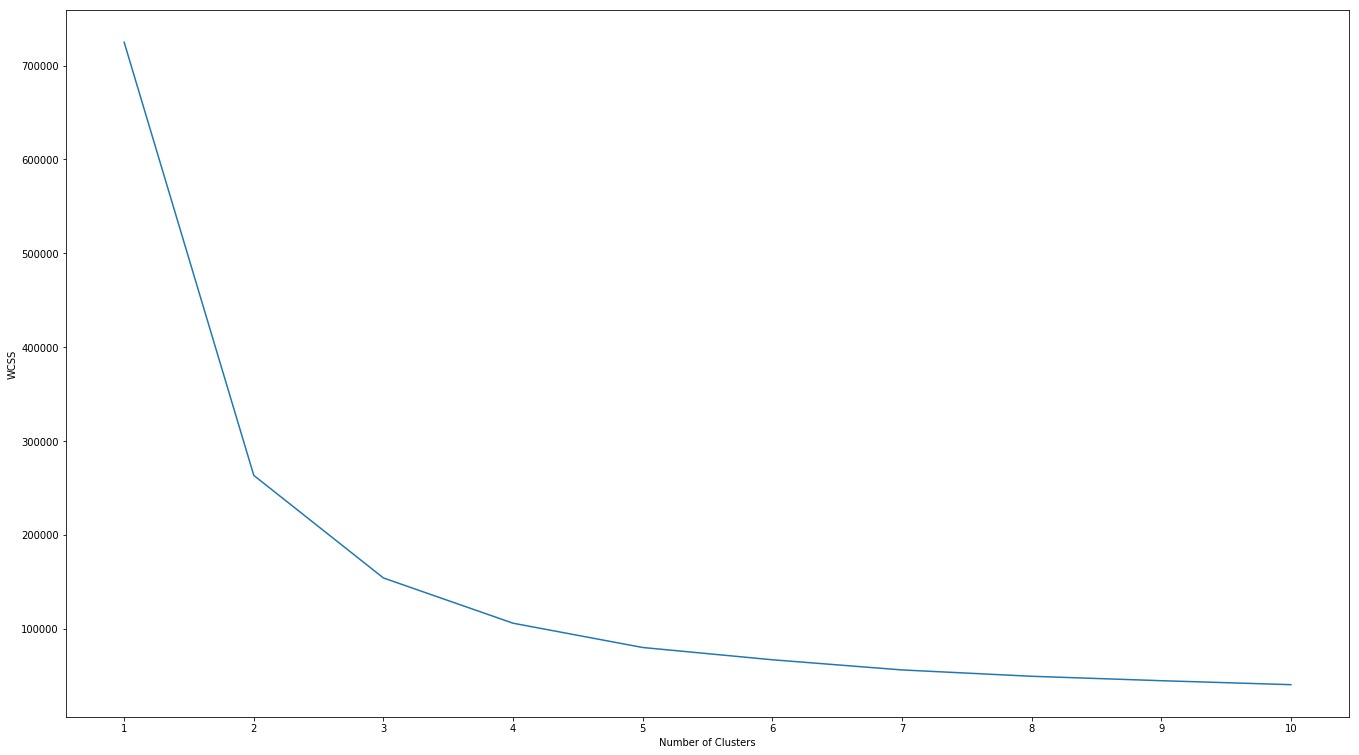

In [1187]:
plt.rcParams["figure.figsize"] = (23,13)
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.show()

It appears the optimal number of clusters is around 2

In [1188]:
kmeans = KMeans(n_clusters = 3, init="k-means++",max_iter=300,n_init=10,random_state=42)
y_kmeans = kmeans.fit_predict(X)

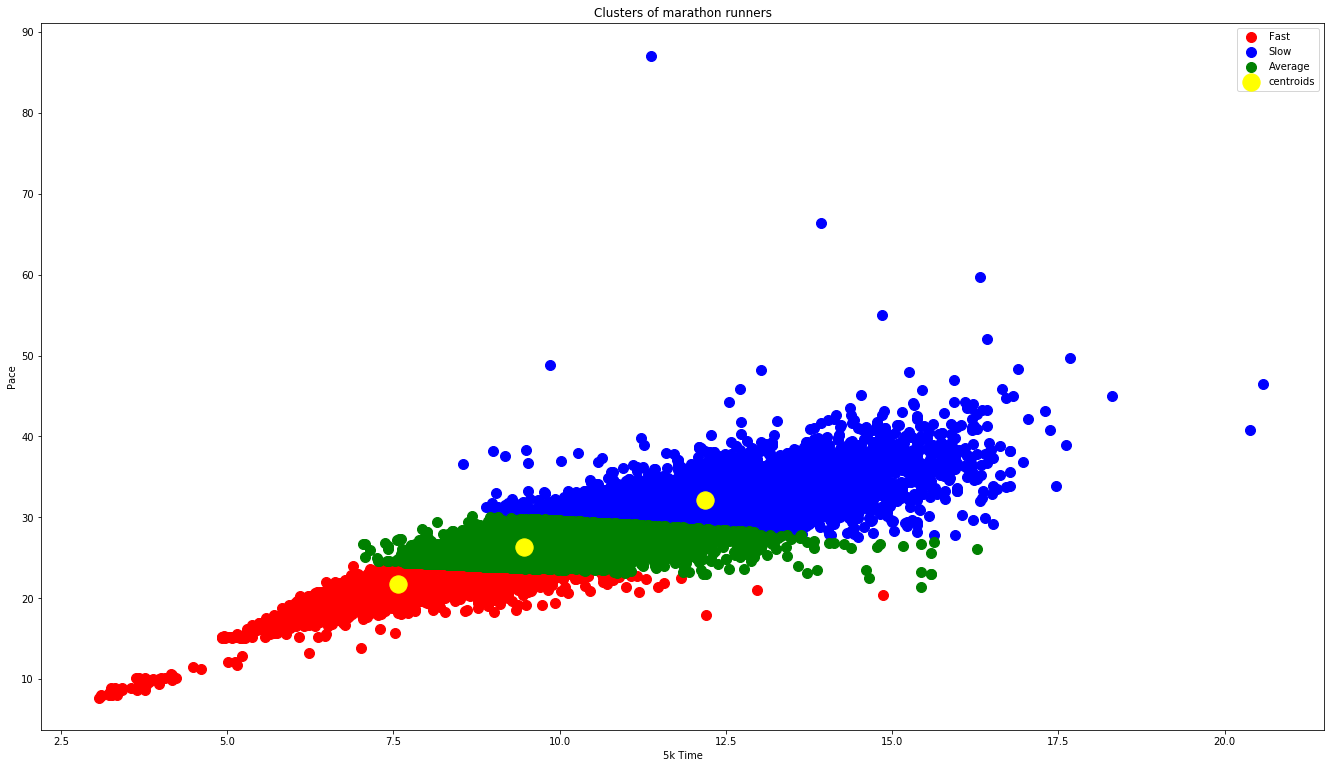

In [1189]:
colors = ["red","blue","green"]
labels = ["Fast","Slow","Average"]
for i,j,k in zip(range(0,3),colors,labels):
    plt.scatter(X[y_kmeans==i,0],X[y_kmeans==i,1],s=100,c=j,label=("{}".format(k)))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="centroids")
plt.title("Clusters of marathon runners")
plt.xlabel("5k Time")
plt.ylabel("Pace")
plt.legend()
plt.show()

Didn't need to normalize data because pace and 5k run times were on a similar scale (time, min.sec). If they were not on the same scale then we would need to normalize the data before fitting to model. Also, do not use K-means for binary classification (no mean, no significant information). 